In [222]:
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

dataset source: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

| names file (C4.5 format) for car evaluation domain

| class values

unacc, acc, good, vgood

| attributes

* buying:   vhigh, high, med, low.
* maint:    vhigh, high, med, low.
* doors:    2, 3, 4, 5more.
* persons:  2, 4, more.
* lug_boot: small, med, big.
* safety:   low, med, high.
* **class: target variable**

In [236]:
df = pd.read_csv("datasets/12/car.data",
                 names=["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"])
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


# EDA

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [256]:
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [257]:
df.tail(3)

,buying,maint,doors,persons,lug_boot,safety,class
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [258]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,4,4,big,high,unacc
freq,432,432,432,576,576,576,1210


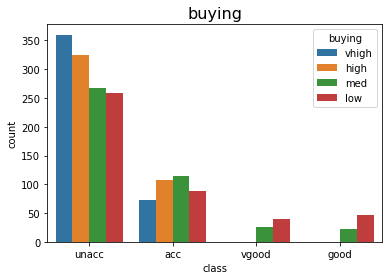

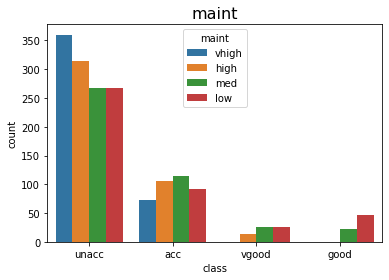

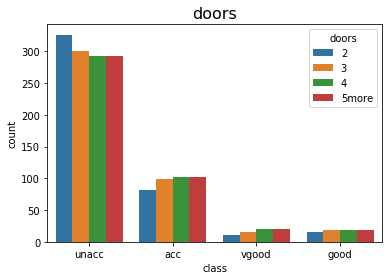

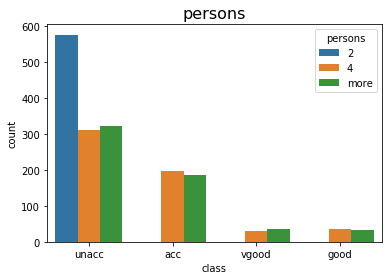

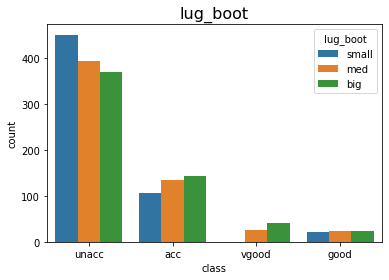

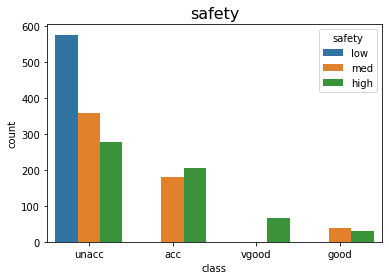

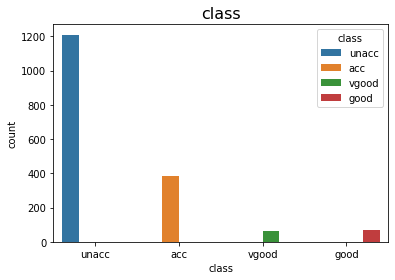

In [255]:
# Распределение
for i in df.columns:
    sns.countplot(x="class", data=df, hue=i)
    plt.title(i, size=16)
    plt.show()

# Modelling

In [292]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Для сравнения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [241]:
rfc = RandomForestClassifier()
lenc = LabelEncoder()
dtc = DecisionTreeClassifier()

In [163]:
X = df.drop("class", axis=1)
y = df["class"]

In [164]:
cols = X.columns
X["buying_enc"] = lenc.fit_transform(X["buying"])
X["maint_enc"] = lenc.fit_transform(X["maint"])
X["doors_enc"] = lenc.fit_transform(X["doors"])
X["persons_enc"] = lenc.fit_transform(X["persons"])
X["lug_boot_enc"] = lenc.fit_transform(X["lug_boot"])
X["safety_enc"] = lenc.fit_transform(X["safety"])

X_encoded = X.drop(cols, axis=1)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25)

In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

In [262]:
rfc.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [303]:
x_pred = rfc.predict(X_test)

print('accuracy: {}'.format(accuracy_score(x_pred, y_test))) 
print('f1: {}'.format(f1_score(x_pred, y_test, average='micro')))
print('recall: {}'.format(recall_score(x_pred, y_test, average='micro')))
print('precision: {}'.format(precision_score(x_pred, y_test, average='micro')))

accuracy: 0.9421296296296297
f1: 0.9421296296296297
recall: 0.9421296296296297
precision: 0.9421296296296297


In [304]:
x_pred = dtc.predict(X_test)

print('accuracy: {}'.format(accuracy_score(x_pred, y_test))) 
print('f1: {}'.format(f1_score(x_pred, y_test, average='micro')))
print('recall: {}'.format(recall_score(x_pred, y_test, average='micro')))
print('precision: {}'.format(precision_score(x_pred, y_test, average='micro')))

accuracy: 0.9583333333333334
f1: 0.9583333333333334
recall: 0.9583333333333334
precision: 0.9583333333333334


In [260]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

In [266]:
X_encoded.columns

Index(['buying_enc', 'maint_enc', 'doors_enc', 'persons_enc', 'lug_boot_enc',
       'safety_enc'],
      dtype='object')

In [289]:
importance = rfc.feature_importances_
cnames = list(X_encoded.columns)
imp = pd.DataFrame({"feature": cnames, "importance rate": importance}).sort_values(by="importance rate", ascending=False)


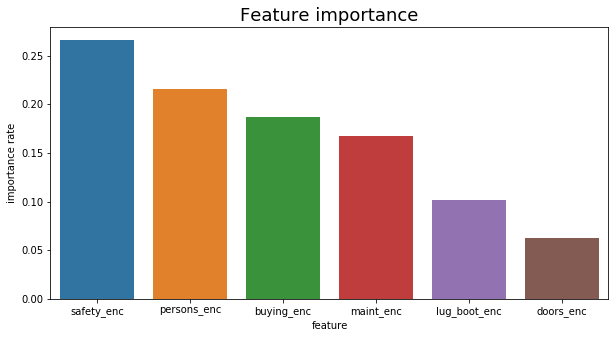

In [291]:
plt.figure(figsize=(10,5))
sns.barplot(data=imp, x="feature", y="importance rate")
plt.title("Feature importance", size=18)
plt.show()